In [2]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import random

In [3]:
yf.pdr_override()
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 11, 29)

df_ibov = web.get_data_yahoo('^BVSP',start,end)

df_ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-22,109750.0,110224.0,107867.0,109037.0,109037.0,15056500
2022-11-23,109036.0,109285.0,107902.0,108683.0,108683.0,13198400
2022-11-24,108846.0,112612.0,108846.0,111831.0,111831.0,10296900
2022-11-25,111831.0,112025.0,108552.0,108977.0,108977.0,12309100
2022-11-28,108977.0,109476.0,108378.0,108866.0,108866.0,0


In [3]:
options = webdriver.ChromeOptions()
prefs ={"download.default_directory":"Users/juliocarvalho/Desktop/PosMapa/Bolsab3"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
driver.get ("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element("link text",'Download')
btn_download.click()

time.sleep(3)

driver.close()

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_4062/2163298492.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_4062/2163298492.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)


In [5]:
df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)
df.head()
df.info()
df.index[:-2]

ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa =" ".join(list(ativos))

ativos_sa

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         92 non-null     object 
 1   Acao           92 non-null     object 
 2   Tipo           94 non-null     object 
 3   Qtde.STeorica  93 non-null     object 
 4   Part.(%)       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5098/318145461.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)


'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA RENT3.SA LWSA3.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RAIZ4.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA SMTO3.SA CSNA3.SA SLCE3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [6]:
yf.pdr_override()
cotacoes_ativos = yf.download(tickers=ativos_sa,period='1Y')
cotacoes_ativos['Adj Close'].info()
cotacoes_ativos.head()
cotacoes_ativos_fechamentos =cotacoes_ativos['Adj Close']
#Removendo NAN
cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


[*********************100%***********************]  92 of 92 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-29
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   251 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA   251 non-null    float64
 17  BRML3.SA   251 non-null    float64
 18  

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5098/3882203413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5098/3882203413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


In [9]:
cotacoes_ativos_fechamentos.info()

percentual_alteracao = cotacoes_ativos_fechamentos.pct_change()
percentual_alteracao

percentual_acumulado = ( 1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0]= 1
percentual_acumulado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-11-29 to 2022-11-29
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   251 non-null    float64
 1   ALPA4.SA   251 non-null    float64
 2   AMER3.SA   251 non-null    float64
 3   ARZZ3.SA   251 non-null    float64
 4   ASAI3.SA   251 non-null    float64
 5   AZUL4.SA   251 non-null    float64
 6   B3SA3.SA   251 non-null    float64
 7   BBAS3.SA   251 non-null    float64
 8   BBDC3.SA   251 non-null    float64
 9   BBDC4.SA   251 non-null    float64
 10  BBSE3.SA   251 non-null    float64
 11  BEEF3.SA   251 non-null    float64
 12  BPAC11.SA  251 non-null    float64
 13  BPAN4.SA   251 non-null    float64
 14  BRAP4.SA   251 non-null    float64
 15  BRFS3.SA   251 non-null    float64
 16  BRKM5.SA   251 non-null    float64
 17  BRML3.SA   251 non-null    float64
 18  CASH3.SA   251 non-null    float64
 19  CCRO3.SA   251 non-null    floa

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-11-30,0.982864,0.986125,0.964070,0.984751,0.977011,0.995317,0.966087,1.033431,0.975918,0.982240,...,0.993520,0.985999,1.016913,0.991971,1.006475,1.004617,0.969231,0.999404,0.994446,1.043499
2021-12-01,0.970624,0.965187,0.899523,1.007625,0.955556,0.930609,0.957391,1.015904,0.970757,0.978293,...,0.992801,0.927505,0.980973,0.980292,1.010504,0.977378,0.888889,0.993243,1.002469,1.046367
2021-12-02,0.979804,0.958628,0.872496,1.060118,0.954023,0.949766,0.996522,1.043817,1.019387,1.028117,...,0.987761,0.941817,1.004228,1.053285,1.057410,0.992151,0.880342,0.998410,1.009565,1.107075
2021-12-03,0.979192,0.978809,0.884261,1.087684,1.019157,0.954874,1.011304,1.045115,1.022257,1.025155,...,0.991361,0.948973,1.038760,1.038686,1.034101,1.011080,0.916239,1.010532,1.011416,1.135755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.999602,0.410486,0.326622,1.286089,1.494794,0.535547,1.093063,1.191639,0.859855,0.861792,...,0.978155,0.916034,0.972994,0.597553,1.271904,0.780006,0.384615,0.829433,1.222259,0.549061
2022-11-24,1.019950,0.425436,0.362625,1.360013,1.530329,0.547041,1.154143,1.211004,0.874928,0.879219,...,1.002363,0.955561,1.028888,0.607681,1.280076,0.822335,0.408547,0.840069,1.247998,0.568808
2022-11-25,1.002781,0.407952,0.355165,1.302434,1.483979,0.530438,1.098533,1.182994,0.863787,0.862916,...,0.988746,0.905054,0.970788,0.592878,1.271432,0.782859,0.382906,0.823902,1.227281,0.540874


In [11]:
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira


['CVCB3.SA', 'HYPE3.SA', 'CSNA3.SA', 'JBSS3.SA', 'ELET3.SA']

In [12]:
carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo']= carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos

,CVCB3.SA,HYPE3.SA,CSNA3.SA,JBSS3.SA,ELET3.SA,saldo,retorno
Date,,,,,,,
2021-11-29,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-11-30,936.082454,991.590563,965.394804,1026.490180,991.190849,4910.748850,-0.017850
2021-12-01,916.151185,979.890389,957.852571,978.404913,994.835974,4827.135033,-0.017027
2021-12-02,908.591072,1007.678266,1045.696478,1010.941650,1047.995252,5020.902718,0.040141
2021-12-03,972.508552,1034.003731,1032.830480,961.992529,1075.030384,5076.365675,0.011046
...,...,...,...,...,...,...,...
2022-11-23,353.264591,1647.278969,667.812050,735.129934,1400.644047,4804.129592,-0.013772
2022-11-24,371.134022,1705.515993,687.222512,747.466433,1449.582896,4960.921857,0.032637
2022-11-25,345.704477,1688.876864,692.768345,737.660500,1404.051205,4869.061391,-0.018517


In [13]:
ibov = yf.download('BOVA11.SA', period='1y') ['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov


[*********************100%***********************]  1 of 1 completed


Date
2021-11-29    5000.000000
2021-11-30    4966.669849
2021-12-01    4903.039806
2021-12-02    5071.709834
2021-12-03    5116.654758
                 ...     
2022-11-23    5314.614463
2022-11-24    5464.094264
2022-11-25    5306.029564
2022-11-28    5310.069652
2022-11-29    5463.084434
Name: Adj Close, Length: 251, dtype: float64

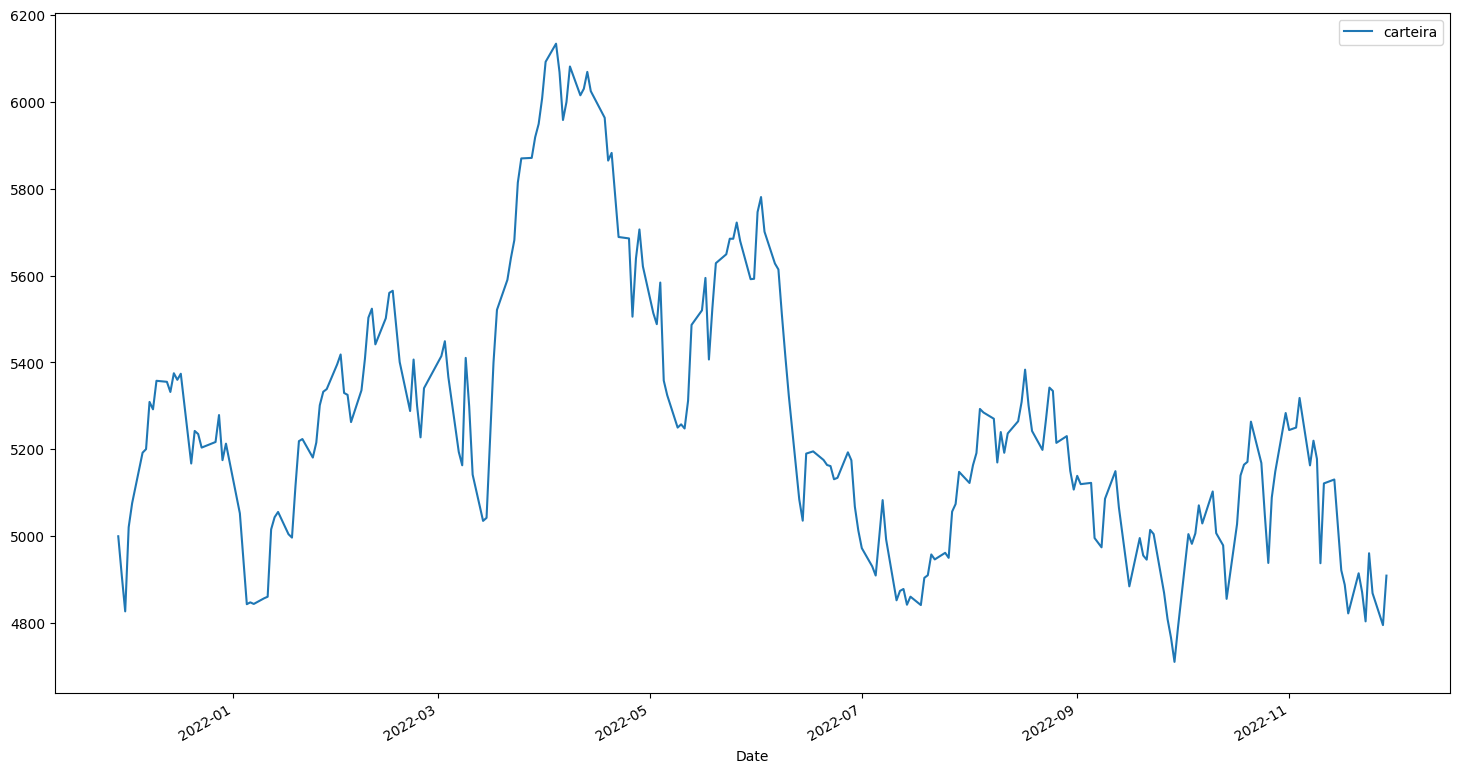

In [14]:
carteira_ativos['saldo'].plot(figsize=(18,10), label= "carteira")
plt.legend()

In [10]:
df_ibov.info

<bound method DataFrame.info of                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-03  104823.0  106125.0  103413.0  103922.0   103922.0  11128500
2022-01-04  103922.0  104276.0  103096.0  103514.0   103514.0  11491600
2022-01-05  103514.0  103514.0  100850.0  101006.0   101006.0         0
2022-01-06  101006.0  102235.0  101000.0  101561.0   101561.0  11749200
2022-01-07  101561.0  102719.0  101104.0  102719.0   102719.0  11733200
...              ...       ...       ...       ...        ...       ...
2022-11-22  109750.0  110224.0  107867.0  109037.0   109037.0  15056500
2022-11-23  109036.0  109285.0  107902.0  108683.0   108683.0  13198400
2022-11-24  108846.0  112612.0  108846.0  111831.0   111831.0  10296900
2022-11-25  111831.0  112025.0  108552.0  108977.0   108977.0  12309100
2022-11-28  108977.0  109476.0  108378.0  108866.0   108866.0         0

[227 rows x 6 columns]>

In [11]:
df_ibov = pd.read_csv('/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv', sep=';', skiprows=1, index_col=False)
df_ibov.drop(df_ibov.index[-2:], inplace=True)
df_ibov.tail()

,Codigo,Acao,Tipo,Qtde.STeorica,Part.(%)
87,VALE3,VALE,ON NM,4.547.296.398,"15,546"
88,VIIA3,VIA,ON NM,1.576.975.642,"0,206"
89,VBBR3,VIBRA,ON NM,1.114.442.976,"0,959"
90,WEGE3,WEG,ON NM,1.481.593.024,"2,811"
91,YDUQ3,YDUQS PART,ON NM,296.015.511,"0,190"


In [48]:
df_ibov.index

RangeIndex(start=0, stop=92, step=1)

In [52]:
df_ibov.rename(columns={
  'dodigo': 'codigo',
  'Aodigo': 'acao',
  'Qtde.STeorica': 'qtde_teorica',
  'Part.(%)': 'participacao'
},inplace=True)

In [53]:
df_ibov.describe(include='all')

,codigo,Acao,Tipo,qtde_teorica,participacao
count,92,92,92,9.200000e+01,92.000000
unique,92,89,17,NaN,NaN
top,RRRP3,BRADESCO,ON NM,NaN,NaN
freq,1,2,59,NaN,NaN
mean,NaN,NaN,NaN,1.093260e+09,1.086957
std,NaN,NaN,NaN,1.293465e+09,1.936439
min,NaN,NaN,NaN,6.035803e+07,0.036000
25%,NaN,NaN,NaN,2.792159e+08,0.208250
50%,NaN,NaN,NaN,6.788801e+08,0.470000
75%,NaN,NaN,NaN,1.200963e+09,1.047000


In [54]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        92 non-null     object 
 1   Acao          92 non-null     object 
 2   Tipo          92 non-null     object 
 3   qtde_teorica  92 non-null     float64
 4   participacao  92 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.7+ KB


In [55]:
pd.to_numeric(df_ibov['qtde_teorica'])

0     2.004539e+08
1     2.027660e+08
2     4.386653e+09
3     5.960863e+08
4     6.035803e+07
          ...     
87    4.547296e+09
88    1.576976e+09
89    1.114443e+09
90    1.481593e+09
91    2.960155e+08
Name: qtde_teorica, Length: 92, dtype: float64

In [60]:
df_ibov['qtde_teorica'] =df_ibov['qtde_teorica'].str.replace('.', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [57]:
df_ibov['participacao'] = df_ibov['participacao'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [58]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        92 non-null     object 
 1   Acao          92 non-null     object 
 2   Tipo          92 non-null     object 
 3   qtde_teorica  92 non-null     float64
 4   participacao  92 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.7+ KB


In [61]:
df_ibov.loc[df_ibov['participacao'] > 5]

,codigo,Acao,Tipo,qtde_teorica,participacao
51,ITUB4,ITAUUNIBANCO,PN EJ N1,4.799907e+09,6.315
65,PETR4,PETROBRAS,PN N2,4.566441e+09,5.741
87,VALE3,VALE,ON NM,4.547296e+09,15.546


In [62]:
df_ibov.loc[(df_ibov['participacao'] > 2) & (df_ibov['participacao'] < 5)]

,codigo,Acao,Tipo,qtde_teorica,participacao
2,ABEV3,AMBEV S/A,ON,4.386653e+09,3.379
7,B3SA3,B3,ON NM,5.901731e+09,4.204
12,BBDC4,BRADESCO,PN EJ N1,5.156077e+09,3.699
14,BBAS3,BRASIL,ON NM,1.420731e+09,2.461
31,ELET3,ELETROBRAS,ON N1,1.447696e+09,3.275
50,ITSA4,ITAUSA,PN N1,4.736060e+09,2.251
54,RENT3,LOCALIZA,ON NM,8.939782e+08,2.935
64,PETR3,PETROBRAS,ON N2,2.684385e+09,3.771
90,WEGE3,WEG,ON NM,1.481593e+09,2.811


In [63]:
df_ibov['participacao'] > 5

0     False
1     False
2     False
3     False
4     False
      ...  
87     True
88    False
89    False
90    False
91    False
Name: participacao, Length: 92, dtype: bool

In [66]:
df_ibov.iloc[[87, 88]]

,codigo,Acao,Tipo,qtde_teorica,participacao
87,VALE3,VALE,ON NM,4.547296e+09,15.546
88,VIIA3,VIA,ON NM,1.576976e+09,0.206


In [67]:
df_estatistica = df_ibov.describe(include='all')
type(df_estatistica)

pandas.core.frame.DataFrame

In [68]:
import sqlite3 as sql


conexao = sql.connect('Mapab.db')
df_estatistica.to_sql('df_estatistica', conexao)

11

In [69]:
df_ibov.to_sql('ibov', conexao, if_exists='replace')

92

## Mataplotlib
#----------------------------------------------------------------


<AxesSubplot: >

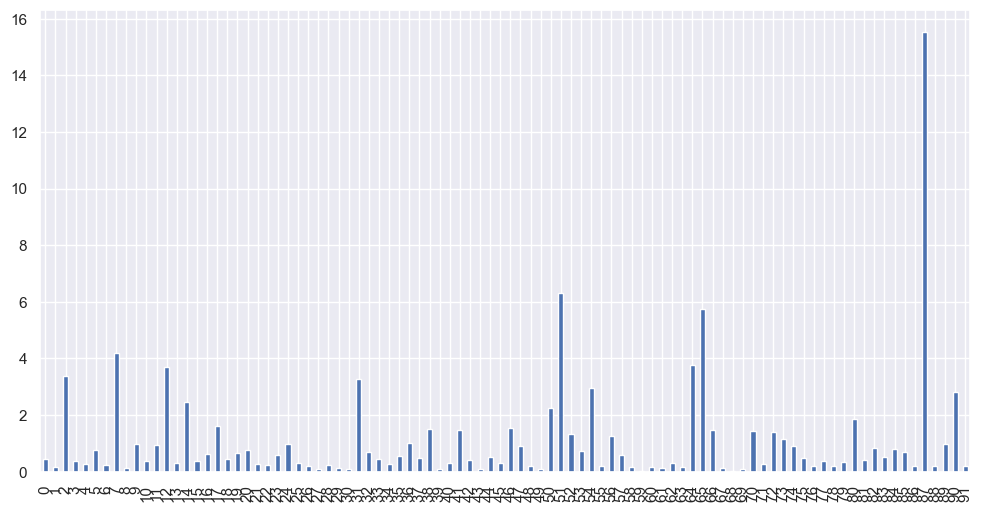

In [70]:
df_ibov['participacao'].plot.bar()

In [31]:
df_tempo = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
df_tempo.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


In [32]:
df_test =  pd.read_csv('https://gist.githubusercontent.com/chriddyp/9166432/raw/0d5410f1f8da88670adc86080e7154009ebf4906/indicator%2520gapminder%2520gdp_per_capita_ppp%2520-%2520Data.csv')
df_test.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,472.053500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,785.127571,804.717458,874.0,887.914578,983.652314,984.805841,1154.859365,1214.613653,1261.354184,1349.696941
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,601.215222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4855.210024,5115.252837,5369.0,5652.049321,5958.021197,6365.530359,6550.896164,6746.445312,6914.267317,6969.306283
4,Algeria,766.253664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5576.851564,5790.967692,6011.0,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214,6354.640523,6419.127829


In [33]:
df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    748 non-null    int64  
 1   Month   748 non-null    int64  
 2   Tmax    748 non-null    float64
 3   Tmin    748 non-null    float64
 4   Rain    748 non-null    float64
 5   Sun     748 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 35.2 KB


In [34]:
df_tempo.to_sql('tempo', conexao, if_exists='replace', index=False)

748

In [35]:
df_clima_2018 = pd.read_sql('select * from tempo where year = 2018', conexao)
df_clima_2018 

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [36]:
df_clima_89 = pd.read_sql('select * from tempo where year = 1989', conexao)
df_clima_89 

,Year,Month,Tmax,Tmin,Rain,Sun
0,1989,1,9.5,3.1,26.0,59.2
1,1989,2,10.2,2.6,40.2,94.2
2,1989,3,12.9,4.5,56.6,100.0
3,1989,4,11.5,4.3,64.2,144.5
4,1989,5,21.0,10.0,12.1,310.1
5,1989,6,22.1,11.4,35.5,258.5
6,1989,7,25.8,14.8,36.7,274.8
7,1989,8,24.2,13.1,55.7,267.1
8,1989,9,20.7,12.6,10.8,131.2
9,1989,10,17.1,9.7,52.8,113.4


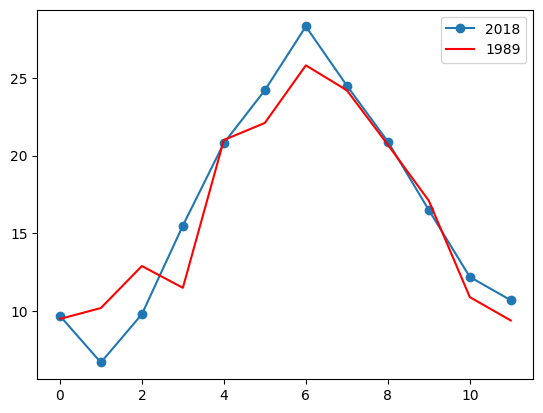

In [37]:
ax_2018 = df_clima_2018.plot(y='Tmax', marker='o')
ax = df_clima_89.plot(y='Tmax', color='red', ax=ax_2018)
ax.legend(['2018','1989'])

In [38]:
df_july = pd.read_sql('SELECT * FROM tempo WHERE month == 6', conexao)

In [39]:
df_july.sort_values(by=['Tmax'], ascending=False, inplace=True)

<AxesSubplot: xlabel='Year'>

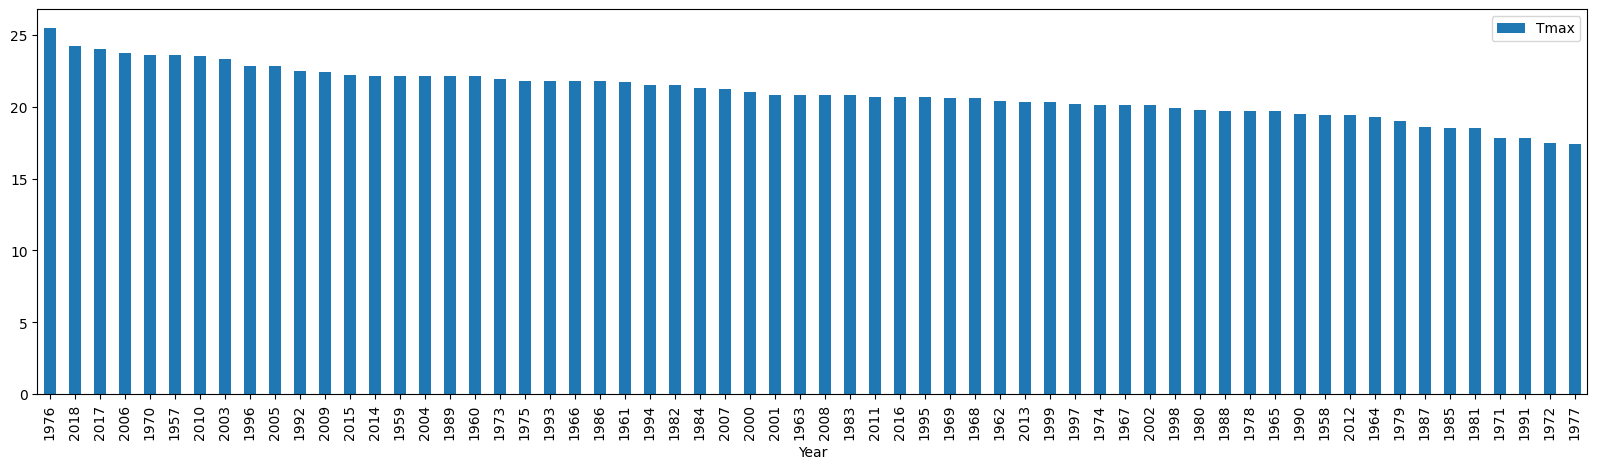

In [40]:
df_july.plot.bar(x='Year', y='Tmax', figsize=(20,5))

In [41]:
import seaborn as sns

sns.set(rc={"figure.figsize":(12,6)})

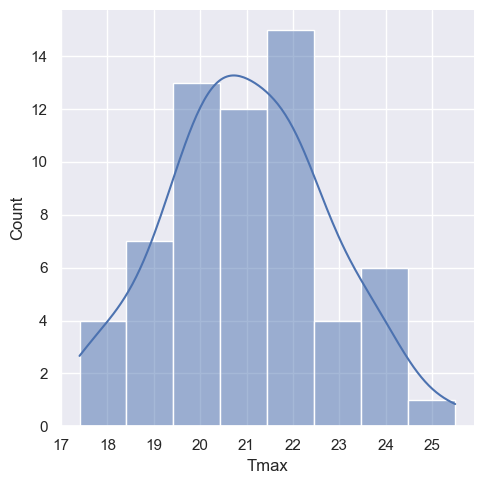

In [42]:
sns.displot(df_july['Tmax'], kde=True)

In [43]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('Watch out!')

2022-11-29 11:47:40,535 Watch out!
